# TP FINAL - EQUIDAD EN ML

### **1. Conjunto de datos**

##### **c) preprocesamiento y EDA**

In [1]:
pip install ucimlrepo


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:


statlog_german_credit_data = fetch_ucirepo(id=144) 
  

X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 


df = pd.concat([X, y], axis=1)


In [4]:

# metadata 
# print(statlog_german_credit_data.metadata) 
  

df

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [5]:
# Diccionario de mapeos en español
attribute_map = {
    "Attribute1": {
        "A11": "< 0 DM",
        "A12": "0 <= ... < 200 DM",
        "A13": ">= 200 DM / asignaciones salariales",
        "A14": "sin cuenta corriente",
    },
    "Attribute3": {
        "A30": "sin créditos / todos pagados",
        "A31": "todos los créditos en este banco pagados",
        "A32": "créditos existentes pagados debidamente",
        "A33": "retraso en el pago",
        "A34": "cuenta crítica / otros créditos",
    },
    "Attribute4": {
        "A40": "coche (nuevo)",
        "A41": "coche (usado)",
        "A42": "muebles/equipos",
        "A43": "radio/televisión",
        "A44": "electrodomésticos",
        "A45": "reparaciones",
        "A46": "educación",
        "A47": "vacaciones (?)",
        "A48": "reentrenamiento",
        "A49": "negocios",
        "A410": "otros",
    },
    "Attribute6": {
        "A61": "< 100 DM",
        "A62": "100 <= ... < 500 DM",
        "A63": "500 <= ... < 1000 DM",
        "A64": ">= 1000 DM",
        "A65": "desconocido / sin ahorros",
    },
    "Attribute7": {
        "A71": "desempleado",
        "A72": "< 1 año",
        "A73": "1 <= ... < 4 años",
        "A74": "4 <= ... < 7 años",
        "A75": ">= 7 años",
    },
    "Attribute9": {
        "A91": "hombre: divorciado/separado",
        "A92": "mujer: divorciada/separada/casada",
        "A93": "hombre: soltero",
        "A94": "hombre: casado/viudo",
        "A95": "mujer: soltera",
    },
    "Attribute10": {
        "A101": "ninguno",
        "A102": "co-solicitante",
        "A103": "garante",
    },
    "Attribute12": {
        "A121": "bienes raíces",
        "A122": "sociedad de construcción / seguro",
        "A123": "coche u otro",
        "A124": "desconocido / sin propiedad",
    },
    "Attribute14": {
        "A141": "banco",
        "A142": "tiendas",
        "A143": "ninguno",
    },
    "Attribute15": {
        "A151": "alquiler",
        "A152": "propio",
        "A153": "gratis",
    },
    "Attribute17": {
        "A171": "desempleado / no calificado - no residente",
        "A172": "no calificado - residente",
        "A173": "empleado calificado / oficial",
        "A174": "gestión / autónomo / altamente calificado",
    },
    "Attribute19": {
        "A191": "sin teléfono",
        "A192": "sí, registrado a nombre",
    },
    "Attribute20": {
        "A201": "sí (trabajador extranjero)",
        "A202": "no (no trabajador extranjero)",
    },
}


for attr, mapping in attribute_map.items():
    df[attr] = df[attr].map(mapping)


In [6]:
df.rename(columns={
    'Attribute1': 'cuenta_corriente',
    'Attribute2': 'duracion_credito_meses',
    'Attribute3': 'historial_crediticio',
    'Attribute4': 'proposito_credito',
    'Attribute5': 'monto_credito',
    'Attribute6': 'cuenta_ahorros',
    'Attribute7': 'antiguedad_empleo',
    'Attribute8': 'tasa_cuota_ingreso',
    'Attribute9': 'estado_civil_genero',
    'Attribute10': 'otros_deudores',
    'Attribute11': 'residencia_actual_anios',
    'Attribute12': 'propiedad',
    'Attribute13': 'edad',
    'Attribute14': 'otros_planes_pago',
    'Attribute15': 'tipo_vivienda',
    'Attribute16': 'cantidad_creditos_existentes',
    'Attribute17': 'ocupacion',
    'Attribute18': 'personas_a_cargo',
    'Attribute19': 'tiene_telefono',
    'Attribute20': 'trabajador_extranjero',
    'class': 'clase_pred'
}, inplace=True)


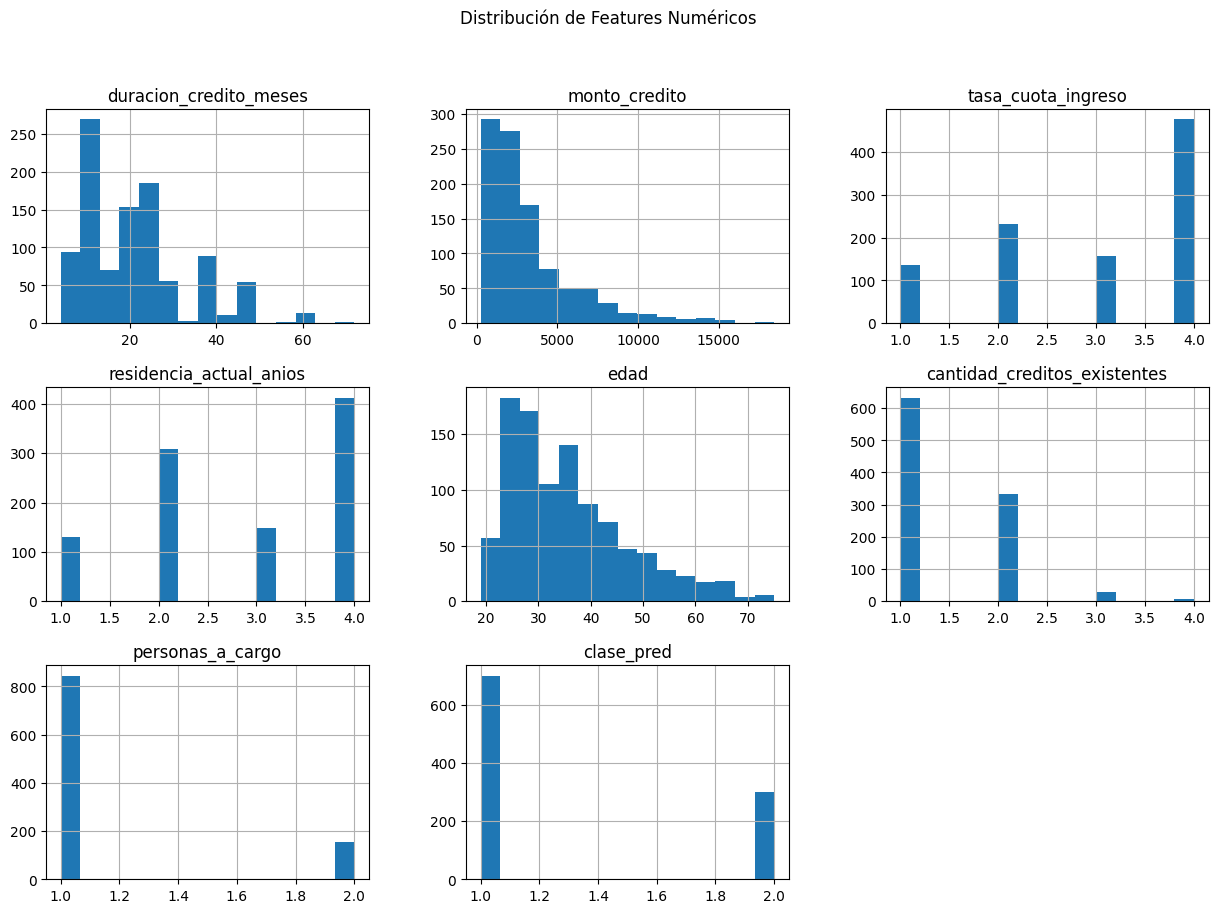

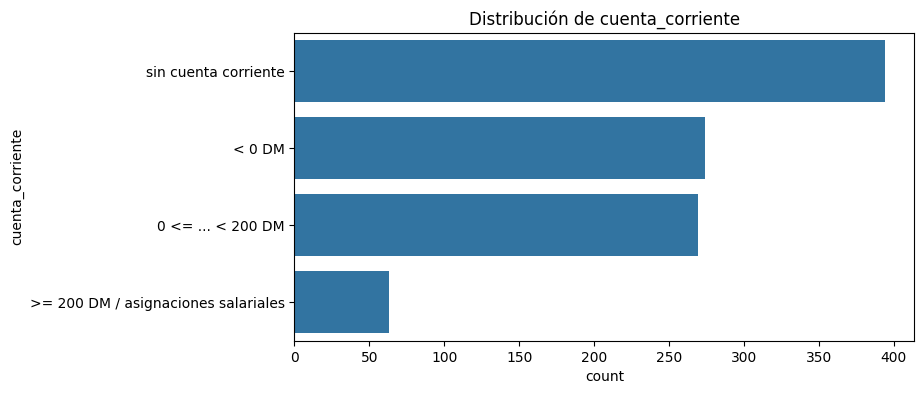

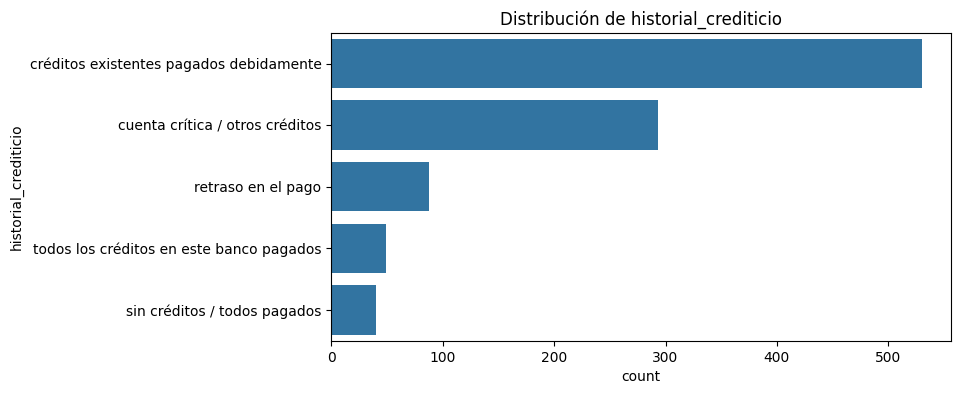

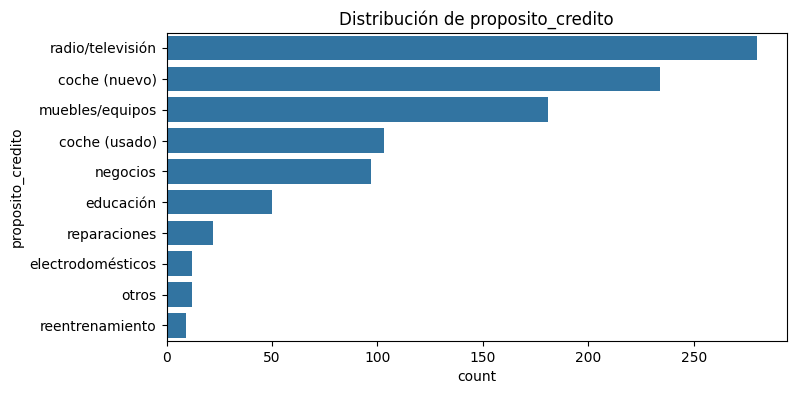

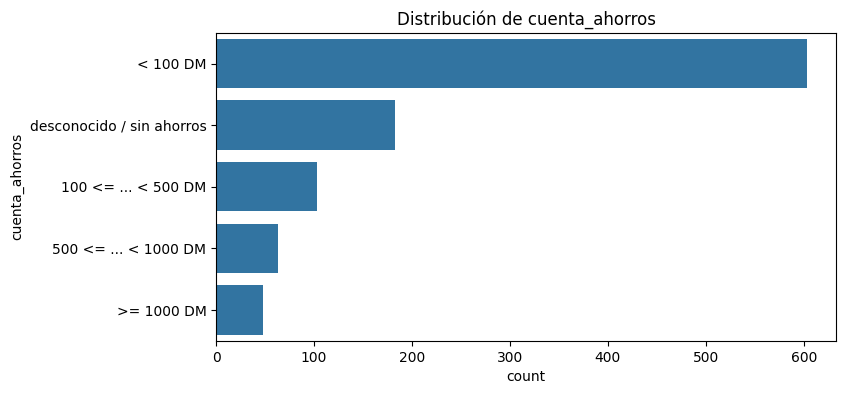

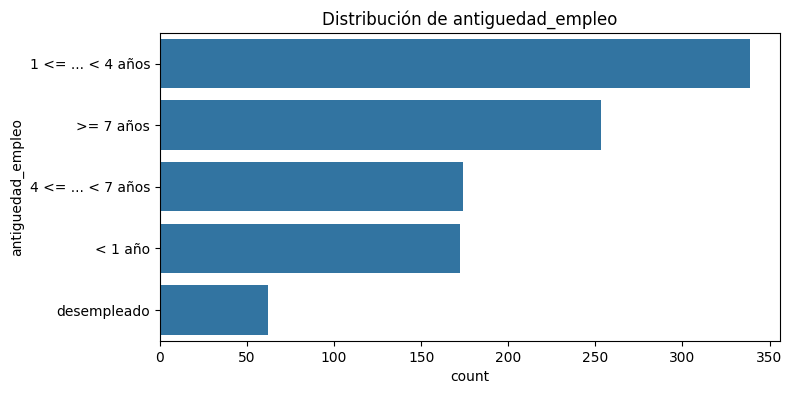

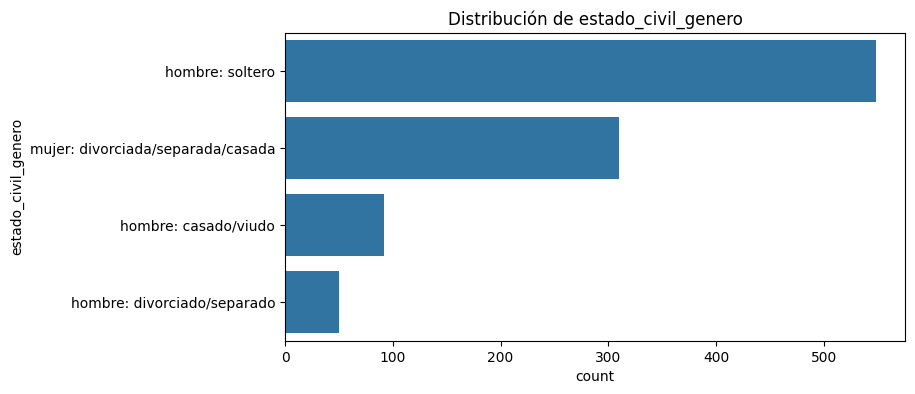

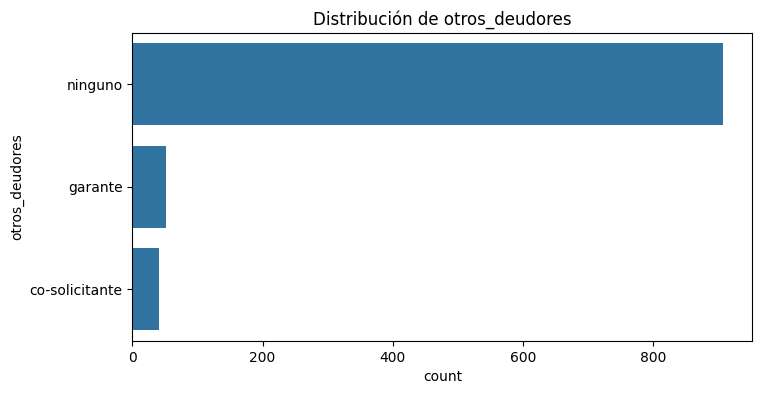

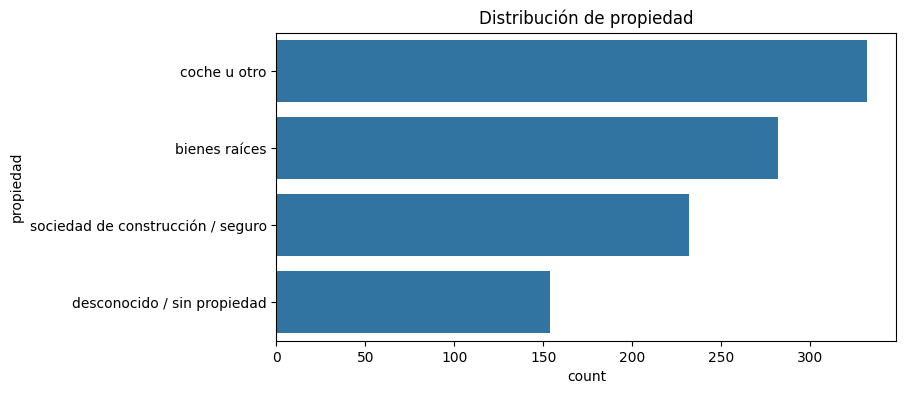

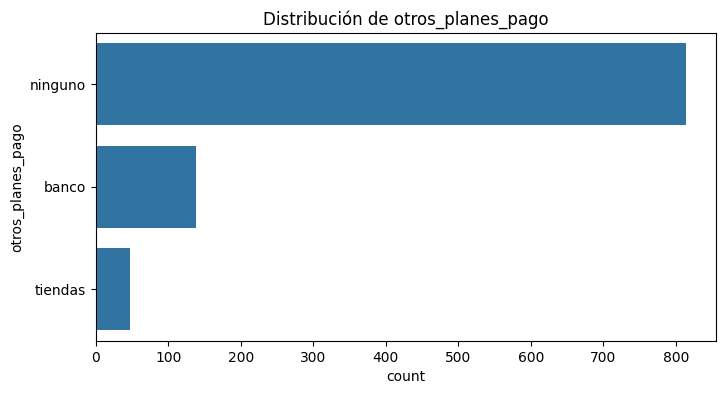

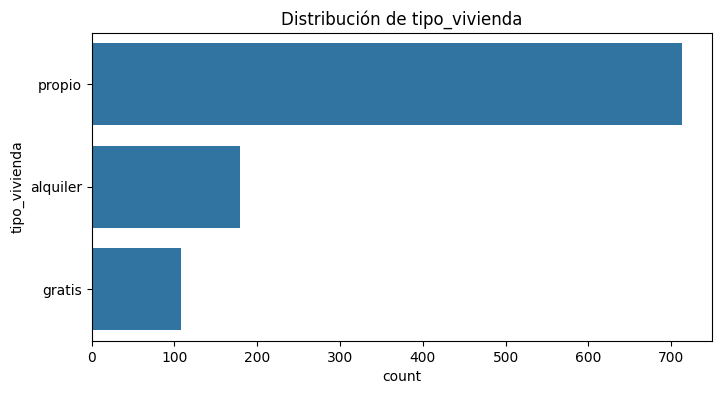

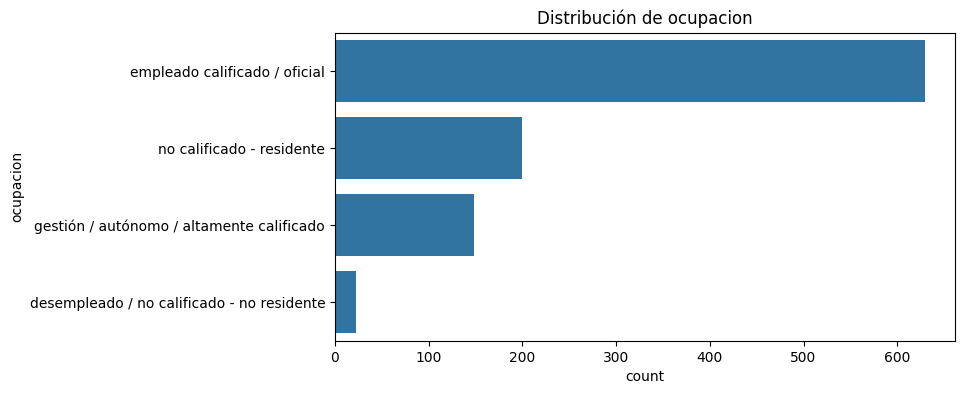

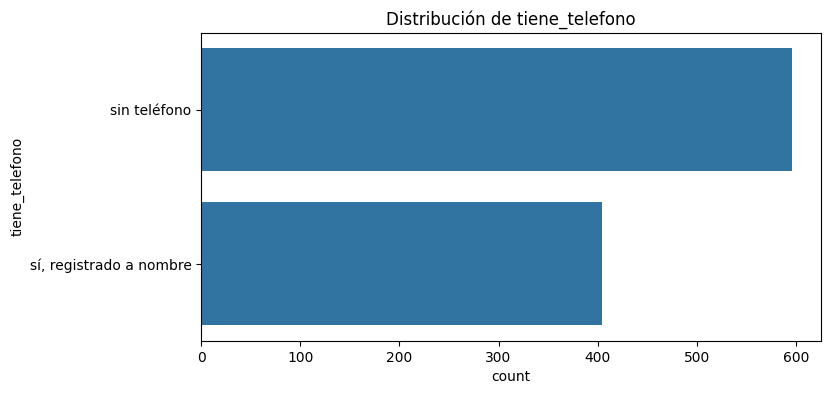

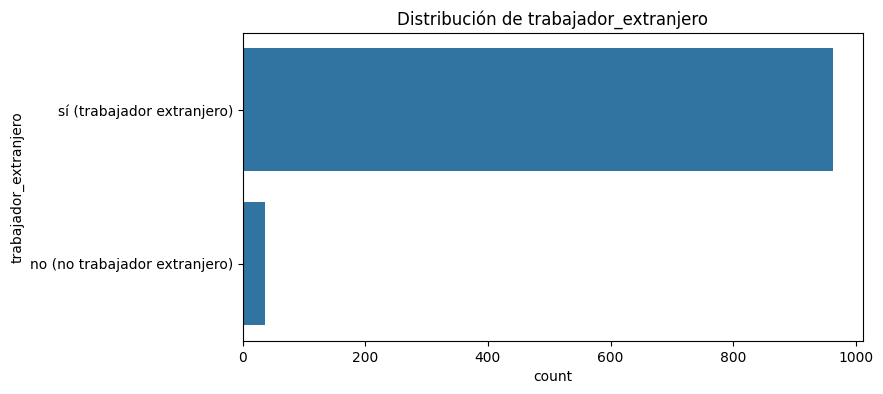

In [8]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribución de Features Numéricos')
plt.show()

# Count plots for categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.show()

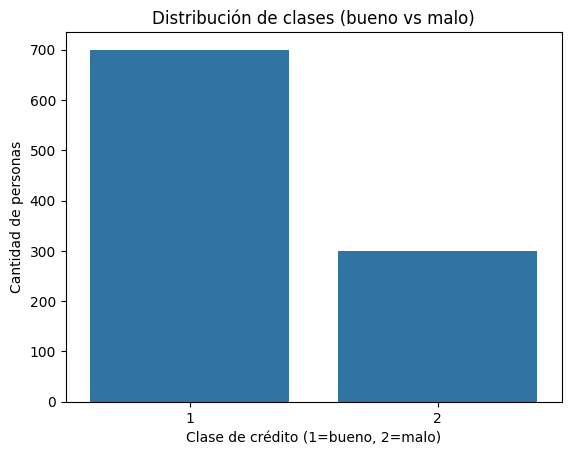

clase_pred
1    70.0
2    30.0
Name: proportion, dtype: float64


In [9]:
# Conteo de clases
sns.countplot(x='clase_pred', data=df)
plt.title("Distribución de clases (bueno vs malo)")
plt.xlabel("Clase de crédito (1=bueno, 2=malo)")
plt.ylabel("Cantidad de personas")
plt.show()

# Porcentaje por clase
print(df['clase_pred'].value_counts(normalize=True) * 100)


In [10]:
df['genero'] = df['estado_civil_genero'].apply(lambda x: 'femenino' if x.startswith('mujer') else 'masculino')
df[['genero', 'estado_civil']] = df['estado_civil_genero'].str.split(': ', expand=True)
df['genero'] = df['genero'].map({'mujer': 'femenino', 'hombre': 'masculino'})


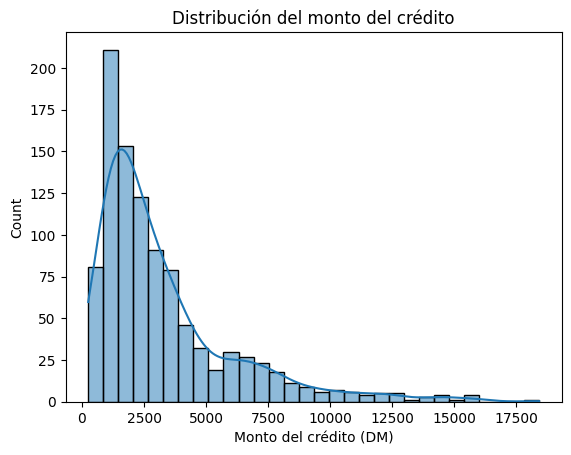

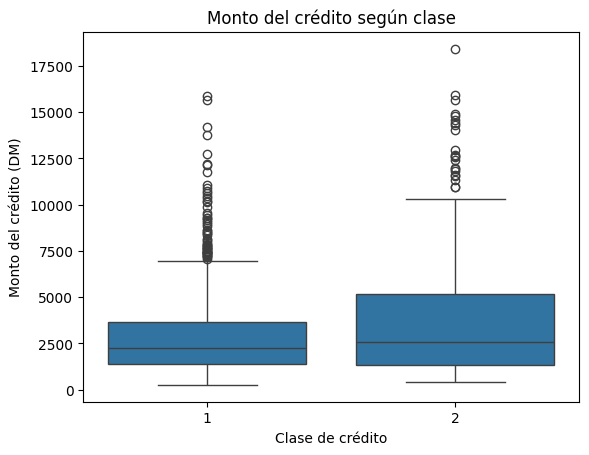

In [ ]:

sns.histplot(df['monto_credito'], bins=30, kde=True)
plt.title("Distribución del monto del crédito")
plt.xlabel("Monto del crédito (DM)")
plt.show()


sns.boxplot(x='clase_pred', y='monto_credito', data=df)
plt.title("Monto del crédito según clase")
plt.xlabel("Clase de crédito")
plt.ylabel("Monto del crédito (DM)")
plt.show()


🔍 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   cuenta_corriente              1000 non-null   object
 1   duracion_credito_meses        1000 non-null   int64 
 2   historial_crediticio          1000 non-null   object
 3   proposito_credito             1000 non-null   object
 4   monto_credito                 1000 non-null   int64 
 5   cuenta_ahorros                1000 non-null   object
 6   antiguedad_empleo             1000 non-null   object
 7   tasa_cuota_ingreso            1000 non-null   int64 
 8   estado_civil_genero           1000 non-null   object
 9   otros_deudores                1000 non-null   object
 10  residencia_actual_anios       1000 non-null   int64 
 11  propiedad                     1000 non-null   object
 12  edad                          1000 non-nul

None


📊 Estadísticas generales:


,duracion_credito_meses,monto_credito,tasa_cuota_ingreso,residencia_actual_anios,edad,cantidad_creditos_existentes,personas_a_cargo,clase_pred
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000



🎯 Distribución de la variable objetivo (clase_pred):
clase_pred
1    0.7
2    0.3
Name: proportion, dtype: float64


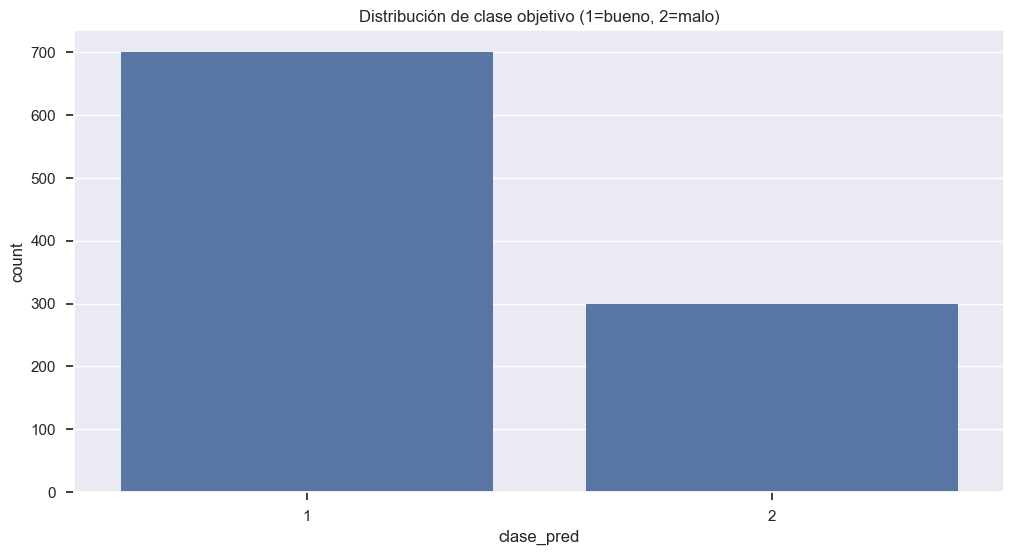

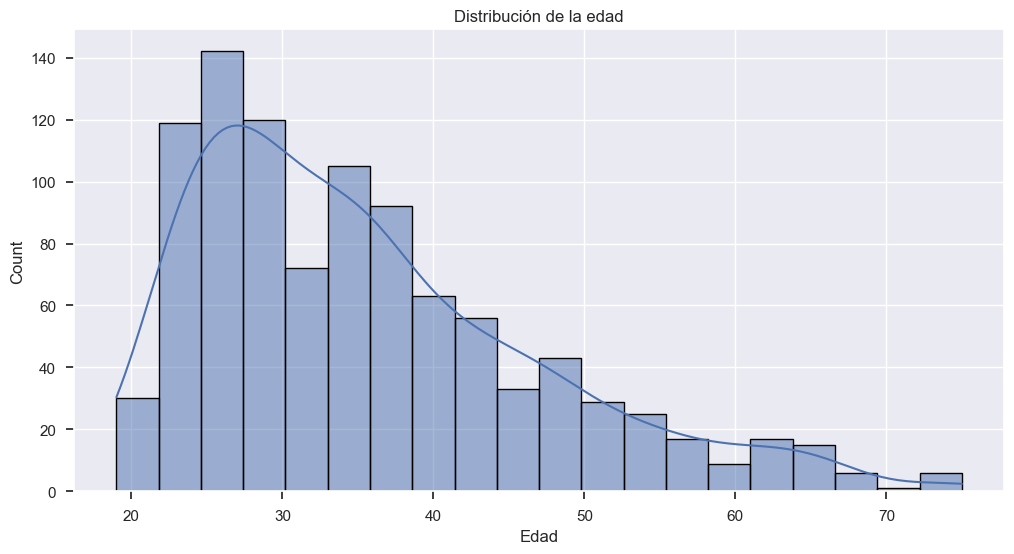

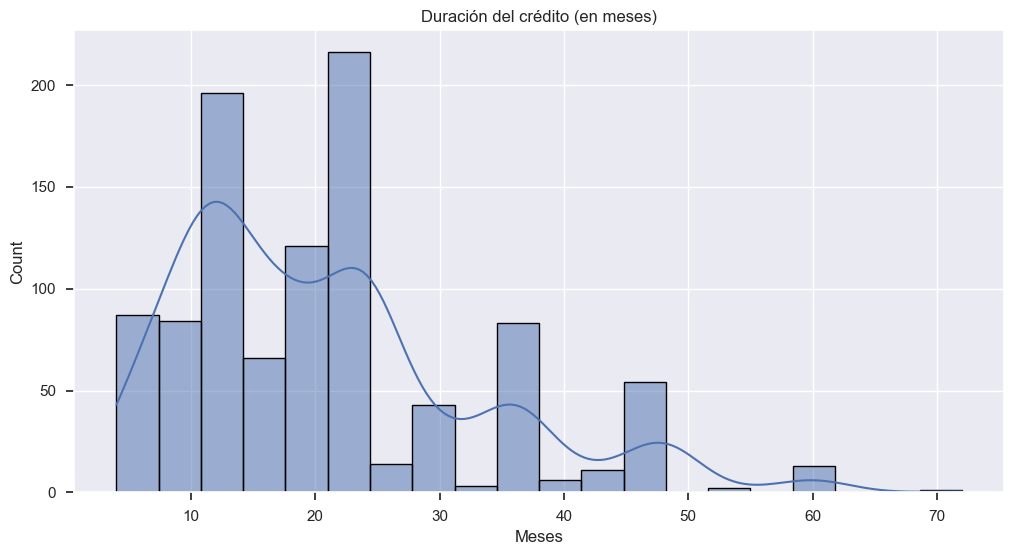

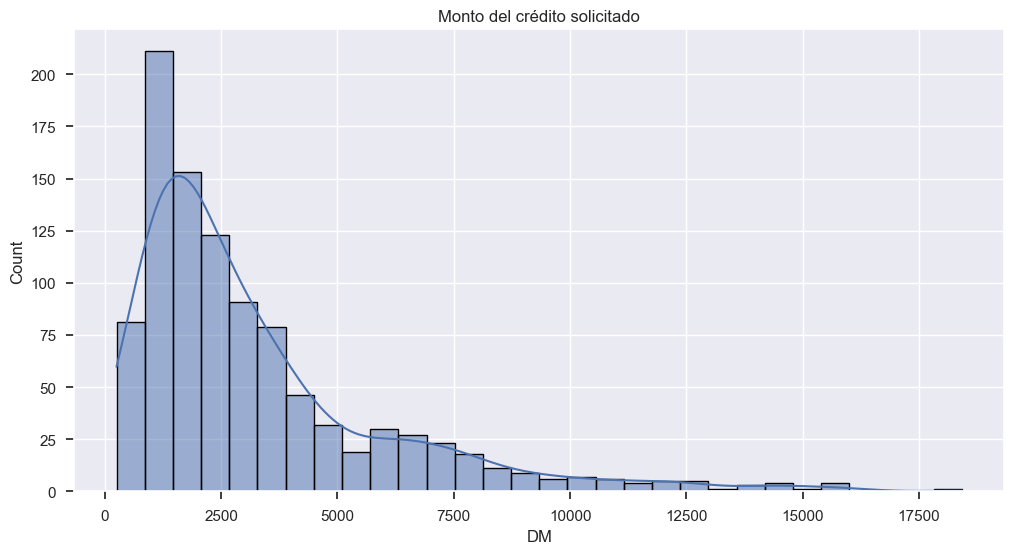


⚖️ Distribución por género:
genero
masculino    0.69
femenino     0.31
Name: proportion, dtype: float64


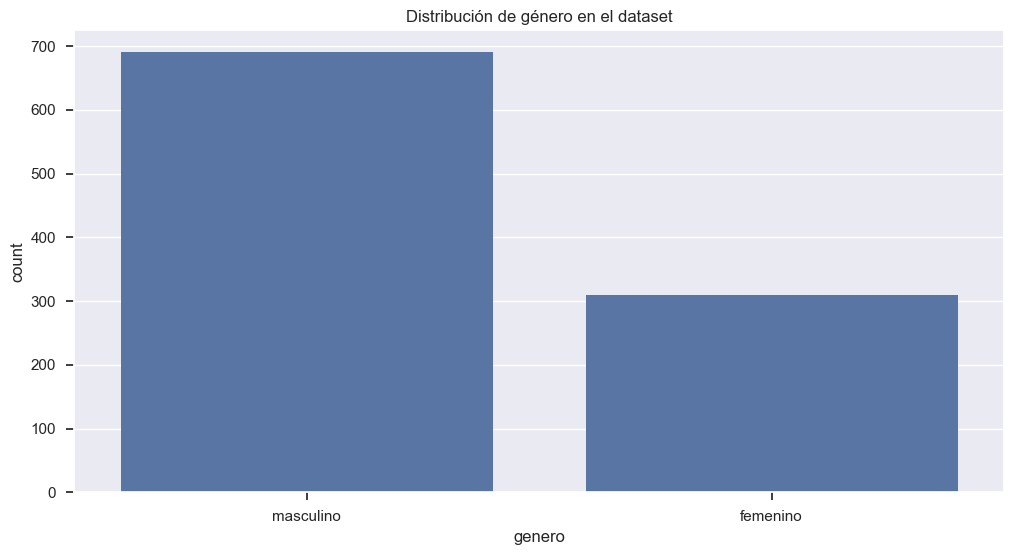


📌 Proporción de clase_pred por género:


clase_pred,1,2
genero,,
femenino,0.648387,0.351613
masculino,0.723188,0.276812


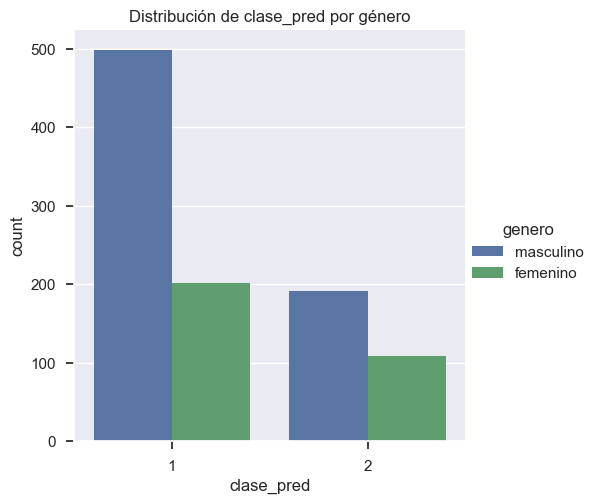

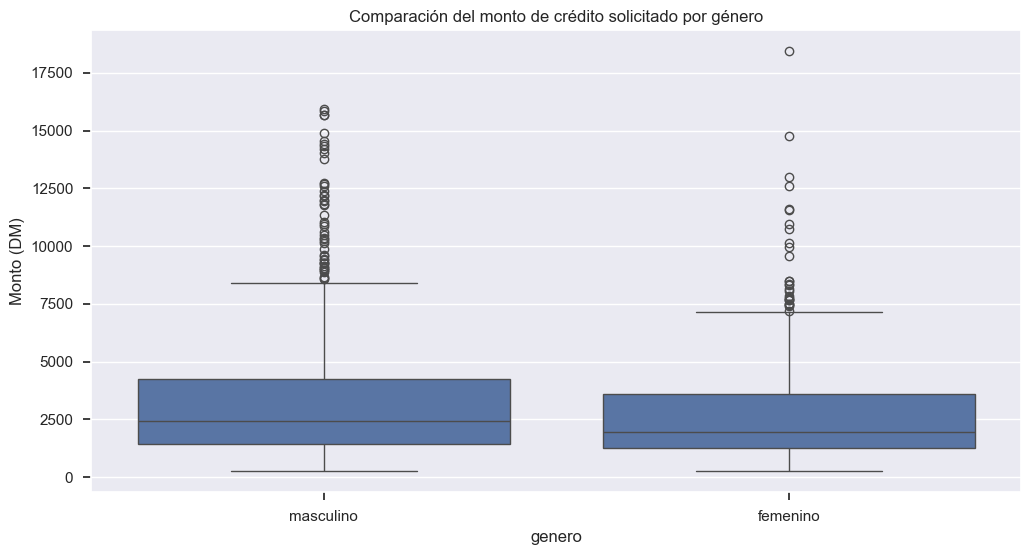

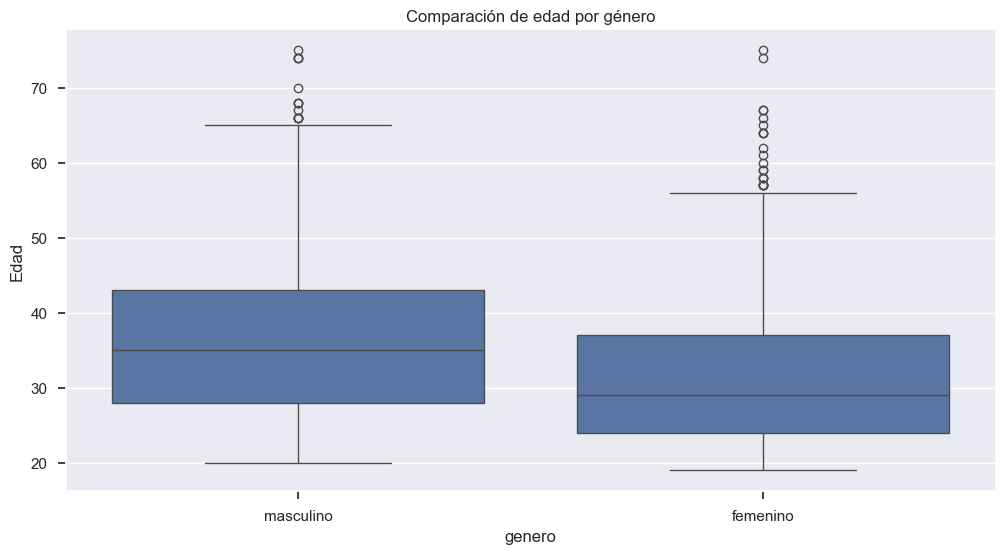

In [ ]:

plt.style.use('seaborn-v0_8')
sns.set_context('notebook')
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Info general
print("🔍 Información general del dataset:")
display(df.info())

# 2. Estadísticas básicas
print("\n📊 Estadísticas generales:")
display(df.describe())

# 3. Distribución de la variable objetivo
print("\n🎯 Distribución de la variable objetivo (clase_pred):")
print(df['clase_pred'].value_counts(normalize=True))

sns.countplot(data=df, x='clase_pred')
plt.title('Distribución de clase objetivo (1=bueno, 2=malo)')
plt.show()

# 4. Distribución de edades
sns.histplot(data=df, x='edad', bins=20, kde=True)
plt.title('Distribución de la edad')
plt.xlabel('Edad')
plt.show()

# 5. Duración del crédito
sns.histplot(data=df, x='duracion_credito_meses', bins=20, kde=True)
plt.title('Duración del crédito (en meses)')
plt.xlabel('Meses')
plt.show()

# 6. Monto del crédito
sns.histplot(data=df, x='monto_credito', bins=30, kde=True)
plt.title('Monto del crédito solicitado')
plt.xlabel('DM')
plt.show()

# 7. Distribución de género
print("\n⚖️ Distribución por género:")
print(df['genero'].value_counts(normalize=True))

sns.countplot(data=df, x='genero')
plt.title('Distribución de género en el dataset')
plt.show()

# 8. Clase por género (SESGO)
print("\n Proporción de clase_pred por género:")
display(df.groupby('genero')['clase_pred'].value_counts(normalize=True).unstack())

sns.catplot(data=df, kind='count', x='clase_pred', hue='genero')
plt.title('Distribución de clase_pred por género')
plt.show()

# 9. Comparación de monto solicitado según género
sns.boxplot(data=df, x='genero', y='monto_credito')
plt.title('Comparación del monto de crédito solicitado por género')
plt.ylabel('Monto (DM)')
plt.show()

# 10. Edad media por género
sns.boxplot(data=df, x='genero', y='edad')
plt.title('Comparación de edad por género')
plt.ylabel('Edad')
plt.show()


#### **1. d) Identificación de sesgos potenciales**

In [13]:
# Representación total por género
print("📊 Distribución total por género:")
display(df['genero'].value_counts(normalize=True).rename('Proporción'))

# Distribución por género de la clase_pred = 1 (bueno)
aprobados = df[df['clase_pred'] == 1]
print("\n📊 Distribución por género entre aprobados:")
display(aprobados['genero'].value_counts(normalize=True).rename('Proporción'))

# Comparación lado a lado
pivot = df.groupby('genero')['clase_pred'].value_counts(normalize=True).unstack().rename(columns={1: 'bueno', 2: 'malo'})
print("\n📊 Proporción de aprobados/rechazados por género:")
display(pivot)


📊 Distribución total por género:


genero
masculino    0.69
femenino     0.31
Name: Proporción, dtype: float64


📊 Distribución por género entre aprobados:


genero
masculino    0.712857
femenino     0.287143
Name: Proporción, dtype: float64


📊 Proporción de aprobados/rechazados por género:


clase_pred,bueno,malo
genero,,
femenino,0.648387,0.351613
masculino,0.723188,0.276812


**Distribución de género en el dataset:**
- Masculino: 69%

- Femenino: 31%

Esto muestra que el dataset está desbalanceado en términos de género, con mayor representación masculina.

*Distribución de aprobaciones por género (clase = 1):*

- Mujeres: 64.8%

- Hombres: 72.3%

Las mujeres tienen menor proporción de créditos aprobados que los hombres.

In [14]:
# Tasa de aprobación por género
tasa_mujer = len(df[(df['genero'] == 'femenino') & (df['clase_pred'] == 1)]) / len(df[df['genero'] == 'femenino'])
tasa_hombre = len(df[(df['genero'] == 'masculino') & (df['clase_pred'] == 1)]) / len(df[df['genero'] == 'masculino'])

disparate_impact = tasa_mujer / tasa_hombre

print(f"📐 Disparate Impact (Mujer / Hombre): {disparate_impact:.3f}")
if disparate_impact < 0.8:
    print("🔴 Posible sesgo: el grupo protegido recibe aprobaciones significativamente menores.")
else:
    print("🟢 No se observa disparate impact fuerte.")


📐 Disparate Impact (Mujer / Hombre): 0.897
🟢 No se observa disparate impact fuerte.


✅ Conclusión: No se viola la "regla del 80%" (umbral = 0.8), por lo que no hay un impacto dispar fuerte, aunque el valor está relativamente cerca.

Este es un estándar fuerte en fairness:

Si el valor cae por debajo de 0.8 (criterio del 80% rule), hay un disparate impact considerado discriminatorio.

En tu caso, está cerca pero aún dentro de lo aceptable → monitorizable, pero no claramente injusto.

In [15]:
aprob_mujer = df[(df['genero'] == 'femenino') & (df['clase_pred'] == 1)].shape[0] / df[df['genero'] == 'femenino'].shape[0] 
aprob_hombre = df[(df['genero'] == 'masculino') & (df['clase_pred'] == 1)].shape[0] / df[df['genero'] == 'masculino'].shape[0]

dpd = aprob_mujer - aprob_hombre
print(f"Diferencia de paridad demográfica (mujer - hombre): {dpd:.3f}")

Diferencia de paridad demográfica (mujer - hombre): -0.075


📉 Las mujeres son aprobadas un 7.5% menos que los hombres en proporción dentro de su grupo.

No es un sesgo extremo, pero sí es una diferencia concreta y significativa desde una perspectiva de equidad.

En un contexto bancario, si no hay justificación técnica clara (por ejemplo, variables correlacionadas con riesgo que estén desbalanceadas entre géneros), esto podría indicar una injusticia en la asignación.

Este hallazgo complementa muy bien el Disparate Impact (0.897): estás justo en el borde donde puede considerarse una diferencia preocupante.

##### **Conclusión - Análisis de sesgos por género**
Tras realizar un análisis exploratorio, se observó una distribución desbalanceada de género en el dataset: aproximadamente el 69% de las personas son hombres y el 31% mujeres. Esta disparidad se mantiene entre los casos aprobados.

Sin embargo, al analizar las tasas de aprobación por género, encontramos que:

- El 72.3% de los hombres reciben aprobación.

- El 64.8% de las mujeres reciben aprobación.

Esto se traduce en una *Demographic Parity Difference* de -0.075, indicando que las mujeres son aprobadas **7.5 puntos porcentuales menos** que los hombres en promedio. Además, el Disparate Impact calculado fue 0.897, lo que si bien no es considerado un sesgo fuerte (el umbral crítico suele ser 0.8), sí alerta sobre una diferencia que podría requerir revisión más profunda.

En conjunto, estos indicadores sugieren la **existencia de un posible sesgo de representación o trato desigual por género**, el cual será tenido en cuenta a la hora de construir y evaluar el modelo predictivo.

### **2. Creación de un modelo inicial**

#### **Selección modelo de clasificación - Entrenamiento, evaluación y resultados**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [ ]:
df_modelo = df.copy()

In [89]:
df_modelo['clase_pred'] = df_modelo['clase_pred'].map({1: 1, 2: 0})  # 1: buen pagador, 0: mal pagador

In [90]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   cuenta_corriente              1000 non-null   int32 
 1   duracion_credito_meses        1000 non-null   int64 
 2   historial_crediticio          1000 non-null   object
 3   proposito_credito             1000 non-null   object
 4   monto_credito                 1000 non-null   int64 
 5   cuenta_ahorros                1000 non-null   int32 
 6   antiguedad_empleo             1000 non-null   int32 
 7   tasa_cuota_ingreso            1000 non-null   int64 
 8   estado_civil_genero           1000 non-null   object
 9   otros_deudores                1000 non-null   object
 10  residencia_actual_anios       1000 non-null   int64 
 11  propiedad                     1000 non-null   object
 12  edad                          1000 non-null   int64 
 13  otros_planes_pago  

In [ ]:
Y = df_modelo['clase_pred']
X = df_modelo.drop(columns=['clase_pred', 'estado_civil_genero', 'genero', 'estado_civil'])
X = pd.get_dummies(X, drop_first=True)  # Convertimos variables categóricas a variables dummy
sensible = ['genero']
A = df.loc[:, sensible]

In [106]:
X_train, X_test, Y_train, Y_test, A_train, A_test, df_train, df_test = train_test_split(X, Y, A, df, test_size=0.3, stratify=Y, random_state=42)

In [116]:
def resample_dataset(X_train, Y_train, A_train):
    negative_ids = Y_train[Y_train == 0].index
    positive_ids = Y_train[Y_train == 1].index
    balanced_ids = positive_ids.union(np.random.choice(a=negative_ids, size=len(positive_ids)))

    X_train = X_train.loc[balanced_ids, :]
    Y_train = Y_train.loc[balanced_ids]
    A_train = A_train.loc[balanced_ids, :]
    return X_train, Y_train, A_train

X_train_bal, Y_train_bal, A_train_bal = resample_dataset(X_train, Y_train, A_train)

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, precision_score 

In [ ]:

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1, max_features='log2',
                                  min_samples_leaf=2, min_samples_split=10, n_estimators=300, max_depth=10)
#luego de hacer un gridsearch, elegimos los mejores hiperparámetros (éstos)

In [213]:
rf_model.fit(X_train_bal, Y_train_bal)
Y_pred = rf_model.predict(X_test)
Y_pred = rf_model.predict_proba(X_test)[:, 1] > 0.6

In [214]:
# MODELOS
logistic_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
xgb_model = XGBClassifier(
    random_state=42 
)

In [215]:
# Entrenamiento base
logistic_model.fit(X_train_bal, Y_train_bal)

# Predicciones iniciales
Y_pred_lr = logistic_model.predict(X_test)

c:\Users\Yo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [216]:
'''xgb_model = XGBClassifier(
    n_estimators=best_params_xgb['n_estimators'],
    max_depth=best_params_xgb['max_depth'],
    class_weight=None,
    random_state=42,
    learning_rate=0.1
)'''

xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=0.7,  # menor a 1 para que penalice más a los 0 mal clasificados (FP)
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train_bal, Y_train_bal)

c:\Users\Yo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:15:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

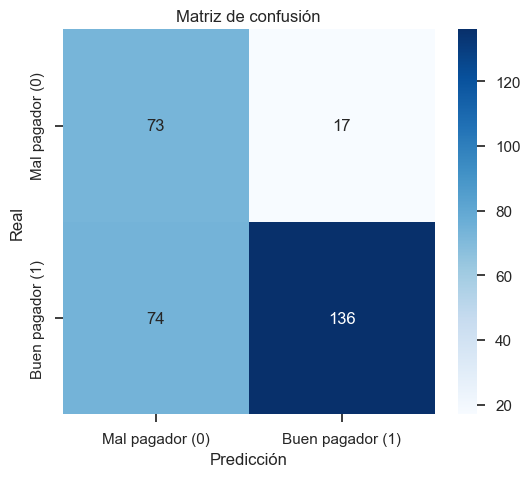

,precision,recall,f1-score,support
0,0.497,0.811,0.616,90.000
1,0.889,0.648,0.749,210.000
accuracy,0.697,0.697,0.697,0.697
macro avg,0.693,0.729,0.683,300.000
weighted avg,0.771,0.697,0.709,300.000


Métricas con Random Forest:
Verdaderos negativos (TN): 73
Falsos positivos (FP): 17
Falsos negativos (FN): 74
Verdaderos positivos (TP): 136
Exactitud: 0.697
Precisión: 0.889
Exhaustividad: 0.648
F1-score: 0.749


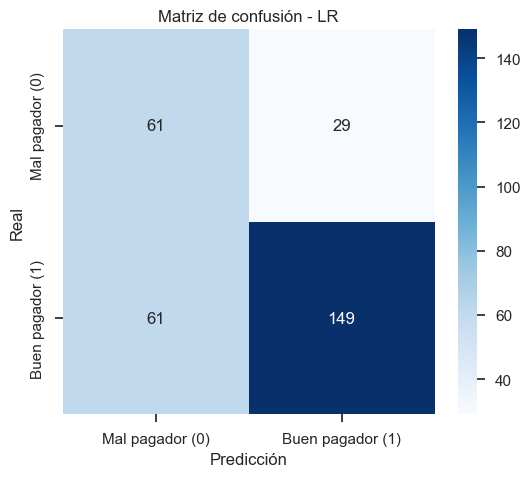

,precision,recall,f1-score,support
0,0.500,0.678,0.575,90.0
1,0.837,0.710,0.768,210.0
accuracy,0.700,0.700,0.700,0.7
macro avg,0.669,0.694,0.672,300.0
weighted avg,0.736,0.700,0.710,300.0


Métricas con Logistic Regression:
Verdaderos negativos (TN): 61
Falsos positivos (FP): 29
Falsos negativos (FN): 61
Verdaderos positivos (TP): 149
Exactitud: 0.700
Precisión: 0.837
Exhaustividad: 0.710
F1-score: 0.768


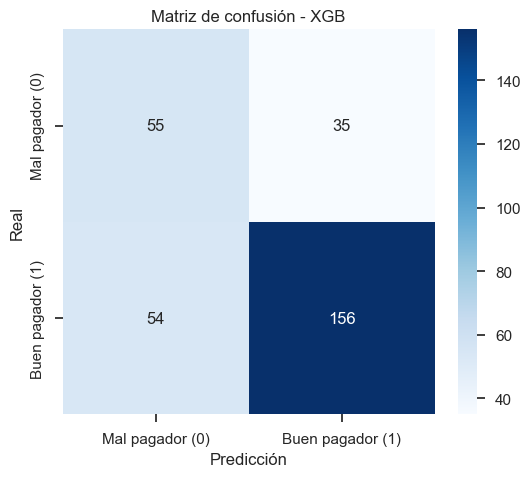

,precision,recall,f1-score,support
0,0.505,0.611,0.553,90.000
1,0.817,0.743,0.778,210.000
accuracy,0.703,0.703,0.703,0.703
macro avg,0.661,0.677,0.665,300.000
weighted avg,0.723,0.703,0.710,300.000


Métricas con XGBoost:
Verdaderos negativos (TN): 55
Falsos positivos (FP): 35
Falsos negativos (FN): 54
Verdaderos positivos (TP): 156
Exactitud: 0.703
Precisión: 0.817
Exhaustividad: 0.743
F1-score: 0.778


In [233]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from fairlearn.metrics import MetricFrame

# Matriz de confusión
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Mal pagador (0)', 'Buen pagador (1)'], yticklabels=['Mal pagador (0)', 'Buen pagador (1)'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

# Métricas individuales
report_dict = classification_report(Y_test, Y_pred, output_dict=True)
metrics_df = pd.DataFrame(report_dict).transpose()
display(metrics_df[['precision', 'recall', 'f1-score', 'support']].round(3))

# Curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)


tn, fp, fn, tp = cm.ravel()
print('Métricas con Random Forest:')
print(f"Verdaderos negativos (TN): {tn}")
print(f"Falsos positivos (FP): {fp}")
print(f"Falsos negativos (FN): {fn}")
print(f"Verdaderos positivos (TP): {tp}")
print(f"Exactitud: {accuracy_score(Y_test, Y_pred):.3f}")
print(f"Precisión: {tp / (tp + fp):.3f}")
print(f"Exhaustividad: {tp / (tp + fn):.3f}")
print(f"F1-score: {2 * (tp / (tp + fp) * tp / (tp + fn)) / ((tp / (tp + fp) + tp / (tp + fn))):.3f}")


'''plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
'''
######################################################

#LR
Y_pred_lr = logistic_model.predict(X_test)
#Y_pred_lr = logistic_model.predict_proba(X_test)[:, 1] > 0.55
cm_lr = confusion_matrix(Y_test, Y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Mal pagador (0)', 'Buen pagador (1)'], yticklabels=['Mal pagador (0)', 'Buen pagador (1)'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión - LR')
plt.show()
# Métricas individuales
report_dict_lr = classification_report(Y_test, Y_pred_lr, output_dict=True)
metrics_df_lr = pd.DataFrame(report_dict_lr).transpose()
display(metrics_df_lr[['precision', 'recall', 'f1-score', 'support']].round(3))
# Curva ROC
tn, fp, fn, tp = cm_lr.ravel()
print('Métricas con Logistic Regression:')
print(f"Verdaderos negativos (TN): {tn}")
print(f"Falsos positivos (FP): {fp}")
print(f"Falsos negativos (FN): {fn}")
print(f"Verdaderos positivos (TP): {tp}")
print(f"Exactitud: {accuracy_score(Y_test, Y_pred_lr):.3f}")
print(f"Precisión: {tp / (tp + fp):.3f}")
print(f"Exhaustividad: {tp / (tp + fn):.3f}")
print(f"F1-score: {2 * (tp / (tp + fp) * tp / (tp + fn)) / ((tp / (tp + fp) + tp / (tp + fn))):.3f}")


######################################################
#XGB
Y_pred_xgb = xgb_model.predict(X_test)
Y_pred_xgb = xgb_model.predict_proba(X_test)[:, 1] > 0.69
cm_xgb = confusion_matrix(Y_test, Y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Mal pagador (0)', 'Buen pagador (1)'], yticklabels=['Mal pagador (0)', 'Buen pagador (1)'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión - XGB')
plt.show()
# Métricas individuales
report_dict_xgb = classification_report(Y_test, Y_pred_xgb, output_dict=True)
metrics_df_xgb = pd.DataFrame(report_dict_xgb).transpose()
display(metrics_df_xgb[['precision', 'recall', 'f1-score', 'support']].round(3))

tn, fp, fn, tp = cm_xgb.ravel()
print('Métricas con XGBoost:')
print(f"Verdaderos negativos (TN): {tn}")
print(f"Falsos positivos (FP): {fp}")
print(f"Falsos negativos (FN): {fn}")
print(f"Verdaderos positivos (TP): {tp}")
print(f"Exactitud: {accuracy_score(Y_test, Y_pred_xgb):.3f}")
print(f"Precisión: {tp / (tp + fp):.3f}")
print(f"Exhaustividad: {tp / (tp + fn):.3f}")
print(f"F1-score: {2 * (tp / (tp + fp) * tp / (tp + fn)) / ((tp / (tp + fp) + tp / (tp + fn))):.3f}")


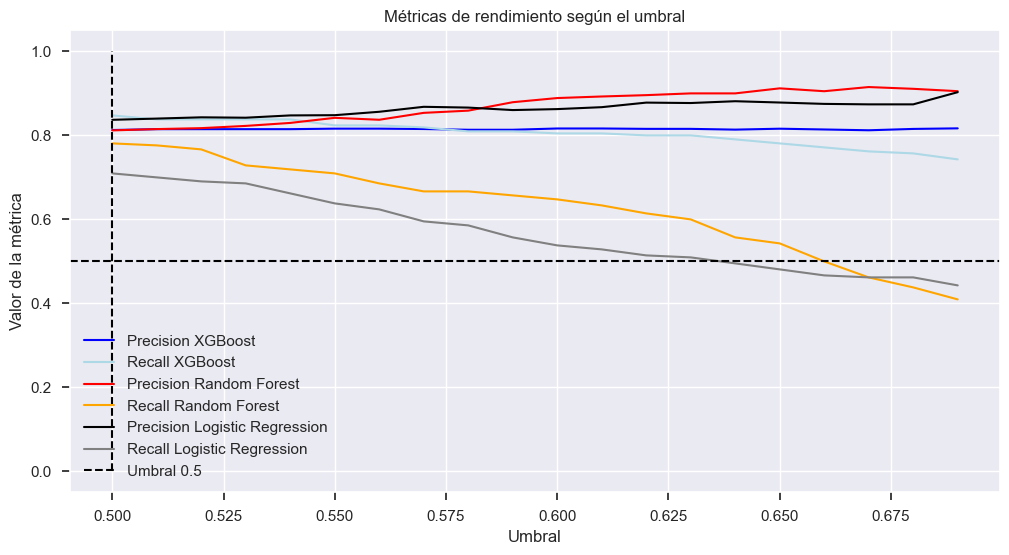

In [ ]:
Y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
Y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
Y_proba_lr = logistic_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Rangos de umbral para probar
thresholds = np.arange(0.5, 0.7, 0.01)

# Listas para guardar resultados
precision_xgb = []
recall_xgb = []
f1_xgb = []

precision_rf = []
recall_rf = []
f1_rf = []

precision_lr = []
recall_lr = []
f1_lr = []

from sklearn.metrics import precision_score, recall_score, f1_score

for threshold in thresholds:
    # Aplicar el umbral a las probabilidades
    Y_pred_xgb = (Y_proba_xgb >= threshold).astype(int)
    Y_pred_rf = (Y_proba_rf >= threshold).astype(int)
    Y_pred_lr = (Y_proba_lr >= threshold).astype(int)

    # Calcular métricas
    precision_xgb.append(precision_score(Y_test, Y_pred_xgb))
    recall_xgb.append(recall_score(Y_test, Y_pred_xgb))
    f1_xgb.append(f1_score(Y_test, Y_pred_xgb))

    precision_rf.append(precision_score(Y_test, Y_pred_rf))
    recall_rf.append(recall_score(Y_test, Y_pred_rf))
    f1_rf.append(f1_score(Y_test, Y_pred_rf))

    precision_lr.append(precision_score(Y_test, Y_pred_lr))
    recall_lr.append(recall_score(Y_test, Y_pred_lr))
    f1_lr.append(f1_score(Y_test, Y_pred_lr))




# Plot
plt.figure(figsize=(12, 6))
plt.plot(thresholds, precision_xgb, label='Precision XGBoost', color='blue')
plt.plot(thresholds, recall_xgb, label='Recall XGBoost', color='lightblue')
plt.plot(thresholds, precision_rf, label='Precision Random Forest', color='red')
plt.plot(thresholds, recall_rf, label='Recall Random Forest', color='orange')
plt.plot(thresholds, precision_lr, label='Precision Logistic Regression', color='black')
plt.plot(thresholds, recall_lr, label='Recall Logistic Regression', color='grey')
plt.axhline(y=0.5, color='black', linestyle='--', label='Umbral 0.5')
plt.title('Métricas de rendimiento según el umbral')
plt.xlabel('Umbral')
plt.ylabel('Valor de la métrica')
plt.legend()
plt.vlines(x=0.5,ymin=0,ymax=1, color='black', linestyle='--')
plt.grid(True)
plt.show()


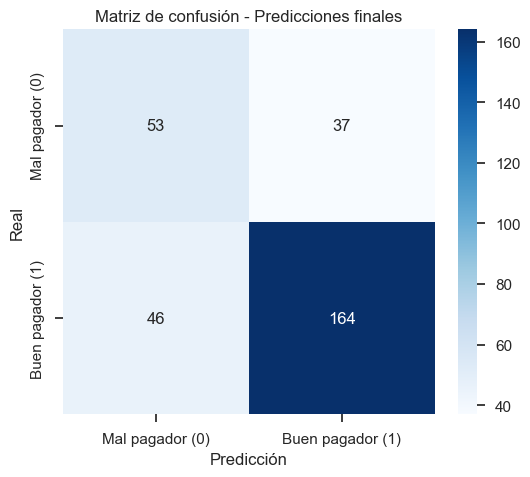

Métricas con XGBoost (predicciones finales):
Verdaderos negativos (TN): 53
Falsos positivos (FP): 37
Falsos negativos (FN): 46
Verdaderos positivos (TP): 164
Exactitud: 0.723
Precisión: 0.816
Exhaustividad: 0.781
F1-score: 0.798


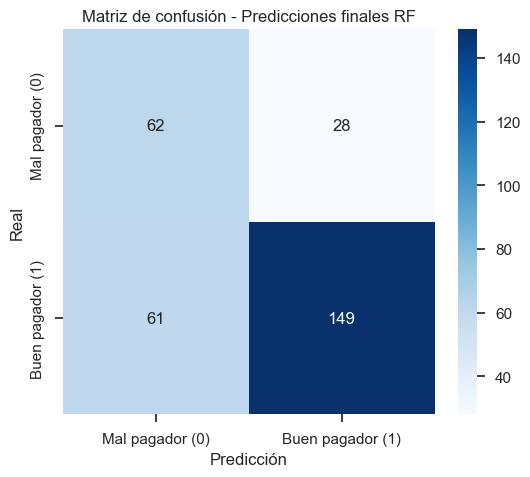

Métricas con Random Forest (predicciones finales):
Verdaderos negativos (TN): 62
Falsos positivos (FP): 28
Falsos negativos (FN): 61
Verdaderos positivos (TP): 149
Exactitud: 0.703
Precisión: 0.842
Exhaustividad: 0.710
F1-score: 0.770


In [ ]:
# nos quedamos con xgboost con un umbral de 0.65 y con random forest con un umbral de 0.6
# Predicciones finales
Y_pred_final = xgb_model.predict(X_test)
Y_pred_final = xgb_model.predict_proba(X_test)[:, 1] > 0.65
# Matriz de confusión
cm_final = confusion_matrix(Y_test, Y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', xticklabels=['Mal pagador (0)', 'Buen pagador (1)'], yticklabels=['Mal pagador (0)', 'Buen pagador (1)'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión - Predicciones finales')
plt.show()

tn, fp, fn, tp = cm_final.ravel()
print('Métricas con XGBoost (predicciones finales):')
print(f"Verdaderos negativos (TN): {tn}")
print(f"Falsos positivos (FP): {fp}")
print(f"Falsos negativos (FN): {fn}")
print(f"Verdaderos positivos (TP): {tp}")
print(f"Exactitud: {accuracy_score(Y_test, Y_pred_final):.3f}")
print(f"Precisión: {tp / (tp + fp):.3f}")
print(f"Exhaustividad: {tp / (tp + fn):.3f}")
print(f"F1-score: {2 * (tp / (tp + fp) * tp / (tp + fn)) / ((tp / (tp + fp) + tp / (tp + fn))):.3f}")


#rf
Y_pred_final_rf = rf_model.predict(X_test)
Y_pred_final_rf_proba = rf_model.predict_proba(X_test)[:, 1] > 0.55
# Matriz de confusión
cm_final_rf = confusion_matrix(Y_test, Y_pred_final_rf_proba)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_final_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Mal pagador (0)', 'Buen pagador (1)'], yticklabels=['Mal pagador (0)', 'Buen pagador (1)'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión - Predicciones finales RF')
plt.show()
tn, fp, fn, tp = cm_final_rf.ravel()
print('Métricas con Random Forest (predicciones finales):')
print(f"Verdaderos negativos (TN): {tn}")
print(f"Falsos positivos (FP): {fp}")
print(f"Falsos negativos (FN): {fn}")
print(f"Verdaderos positivos (TP): {tp}")
print(f"Exactitud: {accuracy_score(Y_test, Y_pred_final_rf_proba):.3f}")
print(f"Precisión: {tp / (tp + fp):.3f}")
print(f"Exhaustividad: {tp / (tp + fn):.3f}")
print(f"F1-score: {2 * (tp / (tp + fp) * tp / (tp + fn)) / ((tp / (tp + fp) + tp / (tp + fn))):.3f}")


##### **Análisis de errores: ¿Cuál es más costoso para el banco?**
Dado que el objetivo de la institución financiera es maximizar la cantidad de préstamos que efectivamente se pagan, es clave analizar el tipo de error que genera mayor impacto negativo.

En este contexto, existen dos errores posibles:

- Falso Positivo (FP): El modelo predice que el cliente pagará el préstamo, pero en realidad no lo hace.
Este error implica una pérdida directa para el banco, ya que otorga un préstamo que probablemente no se recupere.

- Falso Negativo (FN): El modelo predice que el cliente no pagará, pero en realidad sí lo haría.
Este error implica una pérdida de oportunidad, ya que el banco deja de ganar intereses por un préstamo que habría sido exitoso.

✅ Conclusión:
El error más costoso para el banco es el Falso Positivo, porque representa una pérdida financiera concreta, mientras que el Falso Negativo representa una oportunidad perdida, pero sin impacto directo en las finanzas.

¿Qué métrica priorizar?

✅ Tenemos que priorizar la precisión de la clase positiva (pagadores): para asegurarnos de que los aprobados sean efectivamente buenos pagadores.

✅ O alternativamente, también estaría bueno ver el recall de la clase negativa (morosos): para asegurarnos de atrapar la mayor cantidad posible de personas que no pagarían.

Depende de cuán inclusivo o cuán conservador desea ser el banco.

### **3. Evaluación de equidad del modelo inicial**


Cuando un banco utiliza un modelo automático para predecir si una persona es “buena” o “mala” pagadora (es decir, si se le otorgará o no un crédito), es clave asegurarse de que el modelo no discrimine injustamente por variables como género, edad, nacionalidad, etc.

A continuación se describen los principales criterios de fairness, con foco en género como variable sensible (ej.: hombre vs. mujer), en este contexto:

🔹**1. Statistical Parity**

Definición aplicada: significa que la proporción de personas que reciben un préstamo (predicción = “bueno”) sea igual entre géneros.

📌 Ejemplo:
- Si el 70% de los hombres reciben un préstamo, entonces también el 70% de las mujeres deberían recibirlo, sin importar si en realidad pagarán o no.

⚠️ Crítica: Puede dar lugar a injusticias si un grupo tiene en promedio menos capacidad de pago, ya que se exige tratar igual a todos sin considerar el verdadero comportamiento crediticio.

🔹 **2. Equalized Odds**


Definición aplicada: Que el modelo cometa los mismos errores para todos los géneros, tanto Falsos Positivos (FP) como Falsos Negativos (FN).

Entonces:
- La tasa de rechazos incorrectos (FN) entre mujeres debe ser igual que entre hombres.
- Y también la tasa de aprobaciones incorrectas (FP) debe ser igual entre géneros.

✅ Es un criterio más fuerte: no sólo se busca igualdad en el acceso, sino también igualdad en el tratamiento ante errores.

🔹 **3. Equal Opportunity**

Definición aplicad: caso particular de Equalized Odds que sólo exige igualdad en los Falsos Negativos.

📌 Ejemplo:
- Que la tasa de personas que sí iban a pagar pero fueron rechazadas por el modelo (FN) sea igual entre hombres y mujeres.

Es relevante si se quiere evitar dejar afuera injustamente a personas que sí deberían recibir el préstamo, lo que podría generar un sesgo estructural de exclusión.

🔹 **4. Predictive Parity**

Definición aplicada: que la precisión de las predicciones positivas (los que reciben el préstamo) sea igual entre géneros.

📌 Ejemplo:
Si el modelo predice que una persona va a pagar, la proporción real de personas que efectivamente lo hacen (precision) debe ser igual entre hombres y mujeres.

✅ Es útil para ver si las decisiones positivas del modelo tienen igual valor confiable sin importar el grupo.

--------------------------------------------

b. Objetivo: Ver si hay disparidad entre grupos (por ejemplo, entre géneros) en las métricas asociadas a cada tipo de fairness.

✅ Supuestos:
- Variable sensible: gender (ej. masculino/femenino)
- 1 → bueno (persona que pagará el crédito)
- 0 → malo (persona que no pagará)
- y_true: etiquetas verdaderas
- y_pred: predicciones del modelo
- grupo_A = Hombres
- grupo_B = Mujeres
- Umbral de tolerancia de disparidad: 0.1 (10%) → si la diferencia entre métricas > 0.1, consideramos que hay injusticia/falta de equidad

In [248]:
len(Y_pred_final_rf)

300

In [303]:
X.columns

Index(['cuenta_corriente', 'duracion_credito_meses', 'monto_credito',
       'cuenta_ahorros', 'antiguedad_empleo', 'tasa_cuota_ingreso',
       'residencia_actual_anios', 'edad', 'cantidad_creditos_existentes',
       'personas_a_cargo',
       'historial_crediticio_cuenta crítica / otros créditos',
       'historial_crediticio_retraso en el pago',
       'historial_crediticio_sin créditos / todos pagados',
       'historial_crediticio_todos los créditos en este banco pagados',
       'proposito_credito_coche (usado)', 'proposito_credito_educación',
       'proposito_credito_electrodomésticos',
       'proposito_credito_muebles/equipos', 'proposito_credito_negocios',
       'proposito_credito_otros', 'proposito_credito_radio/televisión',
       'proposito_credito_reentrenamiento', 'proposito_credito_reparaciones',
       'otros_deudores_garante', 'otros_deudores_ninguno',
       'propiedad_coche u otro', 'propiedad_desconocido / sin propiedad',
       'propiedad_sociedad de construcci

In [252]:
gender_test = df.loc[X_test.index, 'genero']

In [253]:
gender_test

80      femenino
157    masculino
65     masculino
489    masculino
804     femenino
         ...    
19     masculino
208    masculino
627    masculino
357    masculino
964    masculino
Name: genero, Length: 300, dtype: object

In [ ]:

df_fair = pd.DataFrame({
    'Y_true': Y_test,
    'Y_pred': Y_pred_final,
    'gender': gender_test
})

# Convertimos a binario para facilitar los cálculos (0 = masculino, 1 = femenino)
df_fair['gender_bin'] = df_fair['gender'].map({'masculino': 0, 'femenino': 1})

# Demographic Parity 
dp_masc = df_fair[df_fair['gender_bin'] == 0]['Y_pred'].mean()
dp_fem = df_fair[df_fair['gender_bin'] == 1]['Y_pred'].mean()
gap_dp = abs(dp_masc - dp_fem)

# Equal Opportunity (recall por grupo solo donde Y_true = 1)
recall_masc = df_fair[(df_fair['gender_bin'] == 0) & (df_fair['Y_true'] == 1)]['Y_pred'].mean()
recall_fem = df_fair[(df_fair['gender_bin'] == 1) & (df_fair['Y_true'] == 1)]['Y_pred'].mean()
gap_eq_opp = abs(recall_masc - recall_fem)

# Equalized Odds
fpr_masc = df_fair[(df_fair['gender_bin'] == 0) & (df_fair['Y_true'] == 0)]['Y_pred'].mean()
fpr_fem = df_fair[(df_fair['gender_bin'] == 1) & (df_fair['Y_true'] == 0)]['Y_pred'].mean()
gap_eq_odds = abs(recall_masc - recall_fem) + abs(fpr_masc - fpr_fem)

# Predictive Parity 
precision_masc = df_fair[(df_fair['gender_bin'] == 0) & (df_fair['Y_pred'] == 1)]['Y_true'].mean()
precision_fem = df_fair[(df_fair['gender_bin'] == 1) & (df_fair['Y_pred'] == 1)]['Y_true'].mean()
gap_pred_parity = abs(precision_masc - precision_fem)


print(f"🔎 Demographic Parity gap: {gap_dp:.3f}")
print(f"📊 Equal Opportunity gap: {gap_eq_opp:.3f}")
print(f"⚖️ Equalized Odds gap: {gap_eq_odds:.3f}")
print(f"🎯 Predictive Parity gap: {gap_pred_parity:.3f}")


🔎 Demographic Parity gap: 0.005
📊 Equal Opportunity gap: 0.073
⚖️ Equalized Odds gap: 0.285
🎯 Predictive Parity gap: 0.143


#### **Statistical Parity**
¿Qué medimos?
Proporción de personas a las que el modelo les predice que pagarán (positivos) en cada grupo.

Fórmula:

**SP = 𝑃(Ŷ = 1 ∣ grupo )**

In [315]:
sp_hombres = (Y_pred_final_rf[gender_test == 'masculino'] == 1).mean()
sp_mujeres = (Y_pred_final_rf[gender_test == 'femenino'] == 1).mean()
disparidad_sp = abs(sp_hombres - sp_mujeres)

si_o_no = disparidad_sp < 0.1


print(f"SP en hombres: {sp_hombres:.3f}")
print(f"SP en mujeres: {sp_mujeres:.3f}")
print(f'--' * 20)
print(f"Disparidad de SP: {disparidad_sp:.3f}")
print(f"¿Disparidad aceptable? {'Sí' if si_o_no else 'No'}")

SP en hombres: 0.686
SP en mujeres: 0.646
----------------------------------------
Disparidad de SP: 0.040
¿Disparidad aceptable? Sí


#### **Equalized Odds**
¿Qué medimos?
Tanto el TPR como el FPR deben ser iguales entre grupos.
⚠️ En este caso, se considera la mayor disparidad entre TPR y FPR.

Fórmula:

- **TPR = 𝑃(Ŷ = 1 ∣Y = 1, grupo)**
- **FPR = 𝑃(Ŷ = 1 ∣Y = 0, grupo)**

In [ ]:

tpr_m = ((Y_pred_final_rf == 1) & (Y_test == 1) & (gender_test == 'masculino')).sum() / ((Y_test == 1) & (gender_test == 'masculino')).sum()
tpr_f = ((Y_pred_final_rf == 1) & (Y_test == 1) & (gender_test == 'femenino')).sum() / ((Y_test == 1) & (gender_test == 'femenino')).sum()

fpr_m = ((Y_pred_final_rf == 1) & (Y_test == 0) & (gender_test == 'masculino')).sum() / ((Y_test == 0) & (gender_test == 'masculino')).sum()
fpr_f = ((Y_pred_final_rf == 1) & (Y_test == 0) & (gender_test == 'femenino')).sum() / ((Y_test == 0) & (gender_test == 'femenino')).sum()

disparidad_equalized_odds = abs(tpr_m - tpr_f) + abs(fpr_m - fpr_f)

print(f'TPR en hombres: {tpr_m:.3f}')
print(f'TPR en mujeres: {tpr_f:.3f}')
print(f'--'*50)
print(f'FPR en hombres: {fpr_m:.3f}')
print(f'FPR en mujeres: {fpr_f:.3f}')
print(f'--'*50)
print(f"Disparidad de Equalized Odds: {disparidad_equalized_odds:.3f}")
print(f"¿Disparidad aceptable? {'Sí' if disparidad_equalized_odds < 0.1 else 'No'}")


TPR en hombres: 0.796
TPR en mujeres: 0.746
----------------------------------------------------------------------------------------------------
FPR en hombres: 0.404
FPR en mujeres: 0.455
----------------------------------------------------------------------------------------------------
Disparidad de Equalized Odds: 0.101
¿Disparidad aceptable? No


#### **Equal Opportunity**
¿Qué medimos?
Recall (TPR) para la clase positiva (personas que sí iban a pagar), por grupo.

Fórmula:

**TPR = 𝑃(Ŷ = 1 ∣Y = 1, grupo)**

In [ ]:
eo_hombres = ((Y_pred_final_rf == 1) & (Y_test == 1) & (gender_test == 'masculino')).sum() / ((Y_test == 1) & (gender_test == 'masculino')).sum()    
eo_mujeres = ((Y_pred_final_rf == 1) & (Y_test == 1) & (gender_test == 'femenino')).sum() / ((Y_test == 1) & (gender_test == 'femenino')).sum()


disparidad_eo = abs(eo_hombres - eo_mujeres)

print(f'Tasa de verdaderos positivos (EO) hombres: {eo_hombres:.3f}')
print(f'Tasa de verdaderos positivos (EO) mujeres: {eo_mujeres:.3f}')
print(f'--'*50)

si_o_no = disparidad_eo < 0.1
print(f"Disparidad de EO: {disparidad_eo:.3f}")
print(f"¿Disparidad aceptable? {'Sí' if si_o_no else 'No'}")

Tasa de verdaderos positivos (EO) hombres: 0.796
Tasa de verdaderos positivos (EO) mujeres: 0.746
----------------------------------------------------------------------------------------------------
Disparidad de EO: 0.050
¿Disparidad aceptable? Sí


#### **Predictive Parity**
¿Qué medimos?
Precisión del modelo por grupo: entre los que predijo como positivos, ¿cuántos efectivamente lo eran?


Fórmula:

**PPV = 𝑃( Y = 1 ∣ Ŷ = 1, grupo)**

In [318]:
ppv_m = ((Y_pred_final_rf == 1) & (Y_test == 1) & (gender_test == 'masculino')).sum() / ((Y_pred_final_rf == 1) & (gender_test == 'masculino')).sum()
ppv_f = ((Y_pred_final_rf == 1) & (Y_test == 1) & (gender_test == 'femenino')).sum() / ((Y_pred_final_rf == 1) & (gender_test == 'femenino')).sum()
disparidad_ppv = abs(ppv_m - ppv_f)

print(f'Disparidad en PPV hombres: {ppv_m:.3f}')
print(f'Disparidad en PPV mujeres: {ppv_f:.3f}')
print(f'--'*30)

print(f"Disparidad de PPV: {disparidad_ppv:.3f}")
print(f"¿Disparidad aceptable? {'Sí' if disparidad_ppv < 0.1 else 'No'}")

Disparidad en PPV hombres: 0.836
Disparidad en PPV mujeres: 0.758
------------------------------------------------------------
Disparidad de PPV: 0.078
¿Disparidad aceptable? Sí


#### **Recordando que forman parte del equipo del banco, cual de los criterios de fairness le parece relevante en este contexto. Justificar su elección.**

En el contexto de un banco que otorga créditos, sentimos que el objetivo principal es maximizar la aprobación de personas que efectivamente pagarán el préstamo, y a la vez, minimizar la concesión de créditos a personas que no pagarán (falsos positivos). Esto se traduce en la necesidad de controlar tanto la tasa de verdaderos positivos (TPR) como la tasa de falsos positivos (FPR).

Por ello, consideramos que el criterio de fairness más relevante es **Equalized Odds**, ya que exige que ambos grupos protegidos (M y H) tengan tasas similares tanto de TP como de FP. Esto 'garantiza' que el banco no caiga en un sesgo que afecte desproporcionadamente a un grupo, ya sea otorgándoles indebidamente créditos riesgosos o negándolos injustamente.

De esta forma, se protege no sólo el interés financiero de la institución, sino que además se trata de asegurar una equidad en la evaluación crediticia, evitando **pérdidas innecesarias** y en simultáneo una **discriminación indirecta**. 

#BORRADOR: Otros criterios, como Statistical Parity, podrían ignorar el costo real de los errores y no garantizarían esta protección económica ni equitativa.

### **TODO: 4. Mitigación de Sesgos**

In [338]:
%pip install holisticai[all] jax

from holisticai.bias.mitigation import Reweighing
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


from holisticai.bias.metrics import classification_bias_metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from holisticai.pipeline import Pipeline
from sklearn.metrics import accuracy_score


from holisticai.bias.mitigation import PrejudiceRemover
from holisticai.bias.mitigation import Reweighing

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached jax-0.6.0-py3-none-any.whl.metadata (22 kB)
  Using cached fastparquet-2024.11.0-cp312-cp312-win_amd64.whl.metadata (4.3 kB)
  Using cached flax-0.10.6-py3-none-any.whl.metadata (11 kB)
  Using cached jaxopt-0.8.5-py3-none-any.whl.metadata (3.3 kB)
  Using cached lime-0.2.0.1-py3-none-any.whl
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached optax-0.2.4-py3-none-any.whl.metadata (8.3 kB)
  Using cached pygad-3.3.1-py3-none-any.whl.metadata (19 kB)
  Using cached shap-0.47.2-cp312-cp312-win_amd64.whl.metadata (25 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached jaxlib-0.6.0-cp312-cp312-win_amd64.whl.metadata (1.2 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached msgpack-1.1.0-cp312-cp312-win_amd64.whl.metadata (8.6 kB)
  Using cached orbax_checkpoint-0.11.13-py3-none-any.whl.metadata (2.0 kB)
  U